In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the netflix_titles.csv file as a DataFrame
netflix_df = pd.read_csv("Resources/clean_netflix.csv", encoding="utf-8")
netflix_df

,Movie/TV Show,Title,Country of Production,Date Added to Netflix,Release Year,Parental Rating,Duration,Genre,Calendar Date Added to Netflix,Year Added to Netflix,...,Country 3,Country 4,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",August 14,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",December 23,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",December 20,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",November 16,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,January 1,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7260,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies",January 11,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7261,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",October 19,2020,...,United Kingdom,Denmark,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7262,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",March 2,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7263,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",October 31,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
netflix_df.columns

Index(['Movie/TV Show', 'Title', 'Country of Production',
       'Date Added to Netflix', 'Release Year', 'Parental Rating', 'Duration',
       'Genre', 'Calendar Date Added to Netflix', 'Year Added to Netflix',
       'Country 1', 'Country 2', 'Country 3', 'Country 4', 'Country 5',
       'Country 6', 'Country 7', 'Country 8', 'Country 9', 'Country 10',
       'Country 11', 'Country 12'],
      dtype='object')

# How many movies and tv shows have multiple countries involved?

In [4]:
#netflix_q1["country count"] = netflix_q1["country"].str.split(",").apply(lambda x: len(x))
#netflix_q1.head(20)

# Which country produced the most movies and tv shows?

In [17]:
netflix_df.dtypes

Movie/TV Show                     object
Title                             object
Country of Production             object
Date Added to Netflix             object
Release Year                       int64
Parental Rating                   object
Duration                          object
Genre                             object
Calendar Date Added to Netflix    object
Year Added to Netflix              int64
Country 1                         object
Country 2                         object
Country 3                         object
Country 4                         object
Country 5                         object
Country 6                         object
Country 7                         object
Country 8                         object
Country 9                         object
Country 10                        object
Country 11                        object
Country 12                        object
dtype: object

In [8]:
countrycount = netflix_df["Country of Production"].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
countrycount

United States         3287
India                  990
United Kingdom         721
Canada                 412
France                 349
                      ... 
Dominican Republic       1
Samoa                    1
Cyprus                   1
Jamaica                  1
Afghanistan              1
Length: 121, dtype: int64

In [9]:
top_25 = countrycount.head(25)
top_25

United States     3287
India              990
United Kingdom     721
Canada             412
France             349
Japan              285
Spain              215
South Korea        212
Germany            199
Mexico             154
China              147
Australia          142
Egypt              110
Turkey             108
Hong Kong          102
Italy               89
Brazil              88
Belgium             85
Taiwan              85
Argentina           82
Indonesia           80
Philippines         78
Nigeria             76
Thailand            65
South Africa        54
dtype: int64

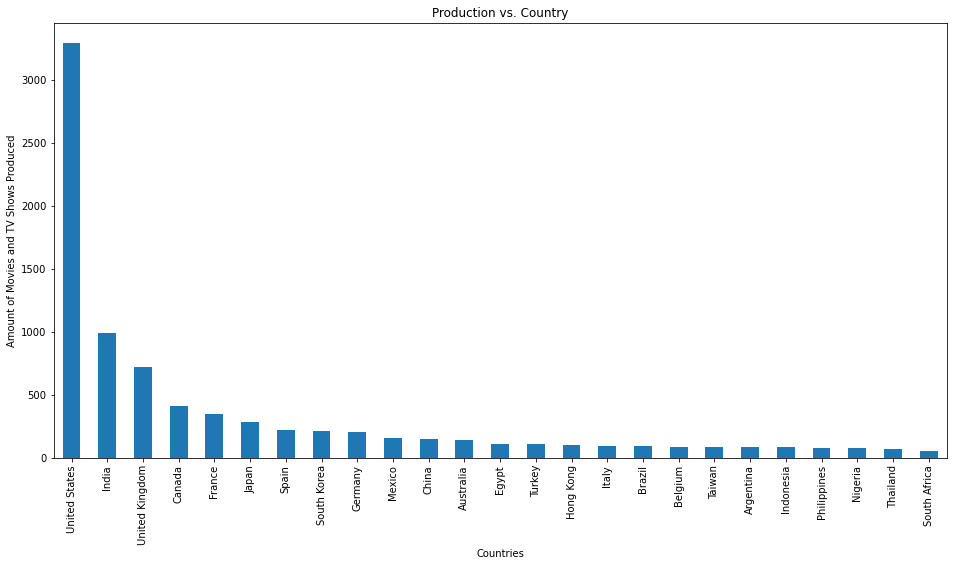

In [11]:
top_25.plot(kind = "bar", figsize = (16,8))
plt.title("Production vs. Country")
plt.xlabel("Countries")
plt.ylabel("Amount of Movies and TV Shows Produced")
plt.show()

# Comparison of US and rest of the world movie and tv show production

Use the above results for this question

# Country of origin vs. when it was added to netflix

In [12]:
countries = netflix_df["Country 1"]
countries

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
7260     United States
7261            Sweden
7262             India
7263         Australia
7264    United Kingdom
Name: Country 1, Length: 7265, dtype: object

In [13]:
netflix_df["Year Added to Netflix"] = pd.to_numeric(netflix_df["Year Added to Netflix"])
netflix_df["Year Added to Netflix"] = netflix_df["Year Added to Netflix"].astype(int)
netflix_df.dtypes

Movie/TV Show                     object
Title                             object
Country of Production             object
Date Added to Netflix             object
Release Year                       int64
Parental Rating                   object
Duration                          object
Genre                             object
Calendar Date Added to Netflix    object
Year Added to Netflix              int64
Country 1                         object
Country 2                         object
Country 3                         object
Country 4                         object
Country 5                         object
Country 6                         object
Country 7                         object
Country 8                         object
Country 9                         object
Country 10                        object
Country 11                        object
Country 12                        object
dtype: object

# Which genres were popular in 2020?

In [14]:
netflix_2020 = netflix_df.loc[netflix_df["Year Added to Netflix"] == 2020]
netflix_2020

,Movie/TV Show,Title,Country of Production,Date Added to Netflix,Release Year,Parental Rating,Duration,Genre,Calendar Date Added to Netflix,Year Added to Netflix,...,Country 3,Country 4,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",August 14,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,January 1,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies",June 1,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Movie,3022,United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",March 19,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,TV Show,​SAINT SEIYA: Knights of the Zodiac,Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",January 23,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,TV Show,Zoids Wild,Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",August 14,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7260,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies",January 11,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7261,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",October 19,2020,...,United Kingdom,Denmark,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7263,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",October 31,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
genre = netflix_2020.Genre.str.get_dummies(sep=', ').sum().sort_values(ascending=False)
genre.head(10)

International Movies        549
Dramas                      535
Comedies                    407
International TV Shows      287
TV Dramas                   186
Action & Adventure          172
Romantic Movies             171
Children & Family Movies    154
Independent Movies          144
TV Comedies                 134
dtype: int64

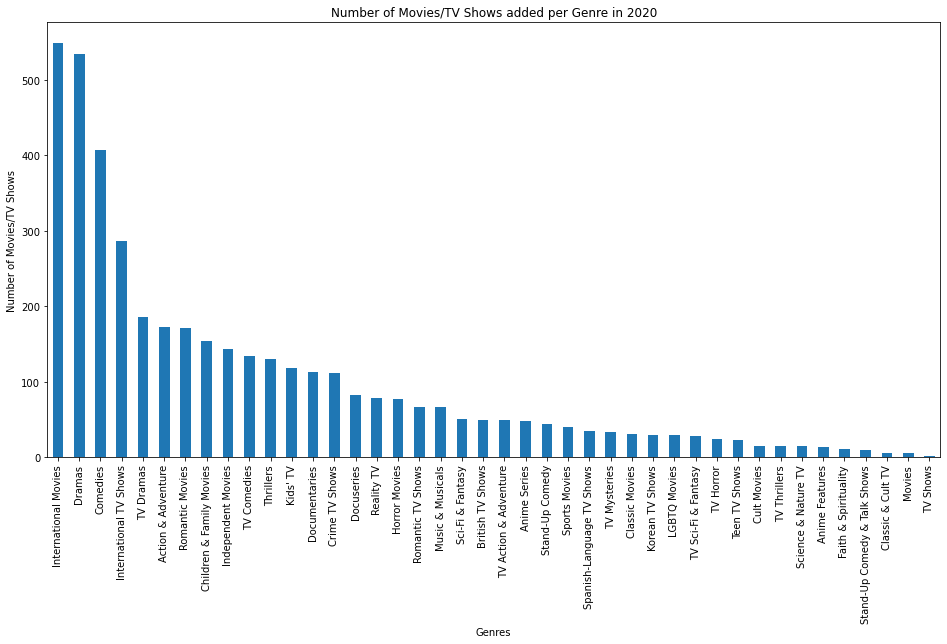

In [16]:
genre.plot(kind = "bar", figsize = (16,8))
plt.title("Number of Movies/TV Shows added per Genre in 2020")
plt.xlabel("Genres")
plt.ylabel("Number of Movies/TV Shows")
plt.show()